In [1]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/6321_project')
os.listdir()

['jupyter',
 'processed_data',
 'trainers',
 'models',
 'data_processor',
 'data_loader',
 'loggers',
 'saved_models',
 'model']

## switch to the root dir

In [4]:
from data_processor.utils import load_numpy_arrays, numpy_to_tensor
from models.MusicCRDNN import MusicCRDNN
import trainers.SGD_trainer
from loggers.statistics_loggers import plot_numerical_arrays
import torch
from torch import nn


## Load preprocessed data

In [5]:
X_train, y_train, X_val, y_val = load_numpy_arrays(['data_train_X.npy','data_train_y.npy', 'data_val_X.npy','data_val_y.npy']
                  , path_prefix='processed_data/processed_waves/10-genres/')

In [6]:
X_train, y_train, X_val, y_val = numpy_to_tensor([X_train, y_train, X_val, y_val])

In [7]:
y_train = y_train.type(torch.int64)
y_val = y_val.type(torch.int64)

In [8]:
print(X_train.shape)
print(y_train.shape)

torch.Size([1598, 501, 40])
torch.Size([1598])


In [9]:
print(X_train[0])
print(y_train[0])

tensor([[-2.2515, -1.9039, -1.6231,  ..., -2.0267, -1.9376, -1.7817],
        [-1.4637, -1.7655, -1.9270,  ..., -1.4429, -1.5084, -1.7305],
        [-1.7726, -2.1026, -2.2693,  ..., -1.8113, -1.7369, -1.7406],
        ...,
        [-0.0146, -0.0134, -0.1776,  ..., -1.3860, -1.6582, -1.5008],
        [ 0.0930,  0.1538, -0.0341,  ..., -1.1890, -1.5168, -1.6089],
        [-0.1187, -0.2323, -0.3049,  ..., -1.4563, -1.3284, -1.3372]])
tensor(2)


In [10]:
print(X_val.shape)
print(y_val.shape)

torch.Size([200, 501, 40])
torch.Size([200])


## Load model

1. define model under the folder models
2. import and define the model

In [11]:
model = MusicCRDNN(10, 120, True)

In [12]:
n_feat = X_train.shape[2]
n_time = X_train.shape[1]

In [13]:
X_a = X_train[:10].reshape((-1, 1, n_time, n_feat))
pred = model(X_a)

## Define loss and optimizer

In [14]:
lr = 0.001
batch_size = 160
num_epoch = 200
model_name = 'CRNN_bidirectional'
saved_model_name = 'saved_models/saved_' + model_name + '_wave.pt'

In [15]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

## Train

use trainers.SGD_trainer.train or define a trainer

parameters of SGD_trainer.train
- model
- train_array: a tuple (X_train, y_train, X_val, y_val)
- loss
- optimizer
- batch_size
- num_epoch
- device

In [16]:
X_train_2d = X_train.reshape((-1, 1, n_time, n_feat))
print(X_train.shape)
X_val_2d = X_val.reshape((-1, 1, n_time, n_feat))
training_loss_array, training_accuracy_array, validation_loss_array, validation_accuracy_array = trainers.SGD_trainer.train(model, (X_train_2d, y_train, X_val_2d, y_val), loss, optimizer, batch_size=batch_size, num_epoch=num_epoch, device='cuda', saved_model_name=saved_model_name)

torch.Size([1598, 501, 40])
Epoch  0: loss on final training batch: 2.2527
training accuracy: 17.83% validation accuracy: 16.00%
Epoch  1: loss on final training batch: 2.0826
training accuracy: 19.84% validation accuracy: 22.00%
Epoch  2: loss on final training batch: 2.0434
training accuracy: 20.71% validation accuracy: 23.50%
Epoch  3: loss on final training batch: 1.9902
training accuracy: 19.52% validation accuracy: 20.50%
Epoch  4: loss on final training batch: 1.9724
training accuracy: 22.22% validation accuracy: 22.00%
Epoch  5: loss on final training batch: 1.9360
training accuracy: 21.46% validation accuracy: 23.50%
Epoch  6: loss on final training batch: 1.9330
training accuracy: 22.03% validation accuracy: 21.50%
Epoch  7: loss on final training batch: 1.8806
training accuracy: 23.28% validation accuracy: 25.50%
Epoch  8: loss on final training batch: 1.8416
training accuracy: 25.22% validation accuracy: 26.50%
Epoch  9: loss on final training batch: 1.8334
training accurac

## Plot

plot_numerical_arrays: plot multiple arrays with the same length

parameters:
- num_arrays: numerical arrays with the same length
- labels: labels of each array(with the same order of num_arrays)
- xlabel
- ylabel
- title

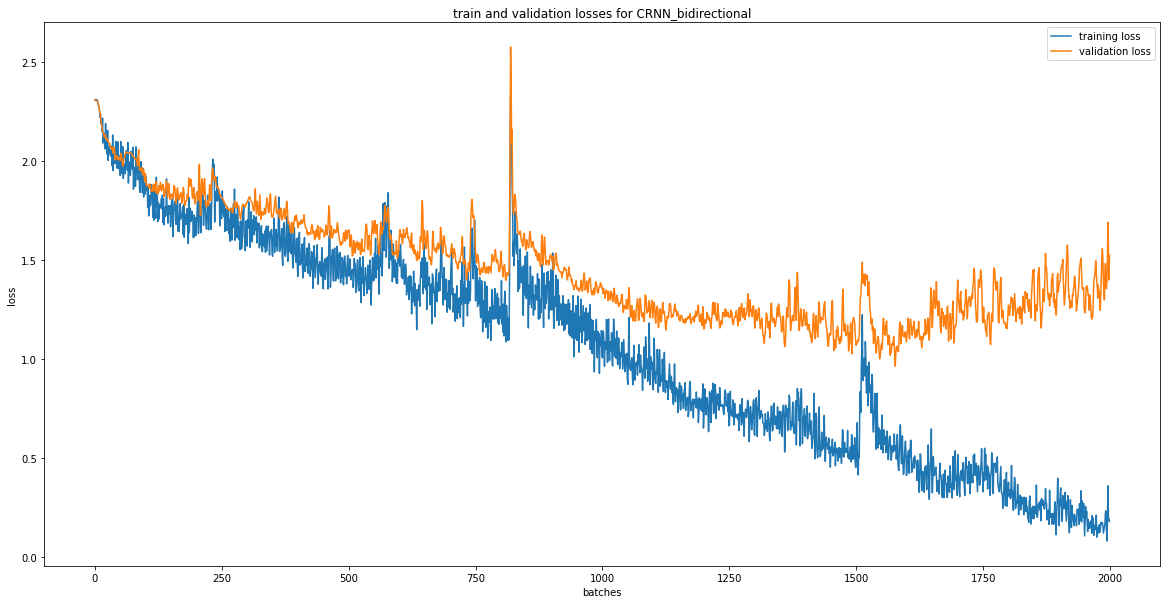

In [17]:
plot_numerical_arrays([training_loss_array, validation_loss_array], ['training loss', 'validation loss'], 
                      xlabel='batches', ylabel='loss', title='train and validation losses for ' + model_name)

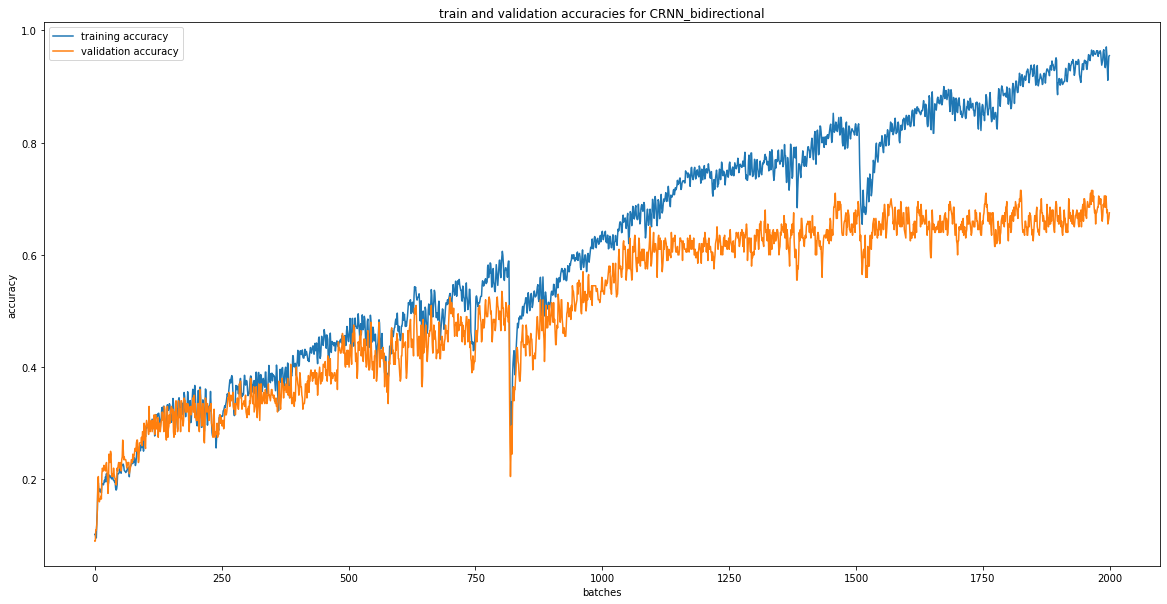

In [18]:
plot_numerical_arrays([training_accuracy_array, validation_accuracy_array], ['training accuracy', 'validation accuracy'], 
                      xlabel='batches', ylabel='accuracy', title='train and validation accuracies for ' + model_name)